In [2]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
%matplotlib inline

# The Fourier Transform

"Any signal can be represented as a sum of sines and cosines of different frequencies."

One way to convince yourself of this fact is to think about linear algebra. If a signal is just a vector in $N$ dimensions, say for $N$ discrete samples of a signal in time, this Fourier decomposition can simply be thought of as a change in coordinates. Consider the set of vectors

$$
\begin{pmatrix}
1 \\
1 \\
\vdots\\
1
\end{pmatrix},
\begin{pmatrix}
\cos(2\pi \times 1 \frac{0}{N}) \\
\cos(2\pi \times 1 \frac{1}{N}) \\
\vdots\\
\cos(2\pi \times 1 \frac{N-1}{N})
\end{pmatrix},
\begin{pmatrix}
\cos(2\pi \times 2 \frac{0}{N}) \\
\cos(2\pi \times 2 \frac{1}{N}) \\
\vdots\\
\cos(2\pi \times 2 \frac{N-1}{N})
\end{pmatrix},
\cdots,
\begin{pmatrix}
\cos(2\pi \times N/2 \frac{0}{N}) \\
\cos(2\pi \times N/2 \frac{1}{N}) \\
\vdots\\
\cos(2\pi \times N/2 \frac{N-1}{N})
\end{pmatrix},
$$
$$
\begin{pmatrix}
\sin(2\pi \times 1 \frac{0}{N}) \\
\sin(2\pi \times 1 \frac{1}{N}) \\
\vdots\\
\sin(2\pi \times 1 \frac{N-1}{N})
\end{pmatrix},
\begin{pmatrix}
\sin(2\pi \times 2 \frac{0}{N}) \\
\sin(2\pi \times 2 \frac{1}{N}) \\
\vdots\\
\sin(2\pi \times 2 \frac{N-1}{N})
\end{pmatrix},
\cdots,
\begin{pmatrix}
\sin(2\pi \times (N/2 - 1) \frac{0}{N}) \\
\sin(2\pi \times (N/2 - 1) \frac{1}{N}) \\
\vdots\\
\sin(2\pi \times (N/2 - 1) \frac{N-1}{N})
\end{pmatrix}
$$

This might be a lot to process all at once, but it's just a discretized set of waves, where the independent variable defining the wave runs along the column axis. All frequencies up to N/2 are used, and by including both sine and cosine waves, we get to N total vectors. We call this set of vectors the "Fourier basis."

Just like how we can represent an N-dimensional signal as a sum of the N basis vectors $[1, 0, \cdots, 0], [0, 1, \cdots, 0], \cdots$ etc., we can also represent it as a sum of these different N basis vectors defined above. All we need for that to be true is for the vectors to be *linearly independent*, which is a fancy way of saying "not redundant"---no vector in this finite set can be a combination of the others (if it were, it wouldn't offer anything new). In fact, not only is that true for the Fourier basis, something even stronger is: these vectors are mutually *orthogonal*! 

In [3]:
#Exercise 1: Define the Fourier basis yourself
# - Decide on a dimensionality of the signal N
# - Then define each vector and store them as rows of a matrix
# - How do we want to order them? All the cosines then all the sines,
#   or do we want cosines and sines of the same frequency to be
#   next to each other? Doens't really matter as long as we know what
#   it is for interpretation later. (Recommend pairing up cosines and
#   sines though.)

#Note: ***You can assume N is even**! Odd case is slightly different and annoying
#so don't worry about it.

def get_Fourier_basis(N):
    #your code here
    Fourier_basis = []
    n = np.arange(0, N)
    for k in range(N):

        if k == 0:
            f = np.ones(N)    
        elif k % 2 == 1:
            freq = (k + 1) / 2
            f = np.cos(2 * np.pi * freq * n / N)
        elif k % 2 == 0:
            freq = k / 2
            f = np.sin(2 * np.pi * freq * n / N)

        Fourier_basis.append(f)

    Fourier_basis = np.array(Fourier_basis)    
    return Fourier_basis
Fourier_basis = get_Fourier_basis(100)

Text(0.5, 0, 'Entry within vector')

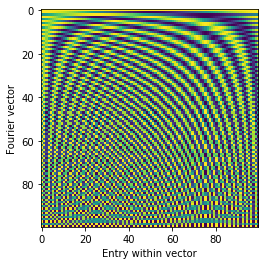

In [4]:
#Visualize this basis a matrix for fun
plt.imshow(Fourier_basis)
plt.ylabel('Fourier vector')
plt.xlabel('Entry within vector')

In [5]:
#Are these unit vectors? Take the norm of each row to investigate yourself

#your code here
Fourier_norms = np.sqrt(np.diag(Fourier_basis.dot(Fourier_basis.T)))

In [6]:
#Exercise 2: Define a function that outputs the basis frequences for a given N
#The purpose is to have them available to plot on the x-axis. Make sure
#the result matches the way you defined Fourier_basis above!
#(You can assume N is even so we can stick to linear algebra and not have
# to dive into arithemtic :p)
#For example, if N = 10, we would have frequenices of [0, 1, 1, 2, 2, 3, 3, 4, 4, 5]
def get_frequencies(N):
    
    #your code here
    double_frequencies = [[f] * 2 for f in range(1, int(N/2))]
    
    return [0] + [f_ for f in double_frequencies for f_ in f] + [N/2]

Text(0.5, 0, 'Frequency')

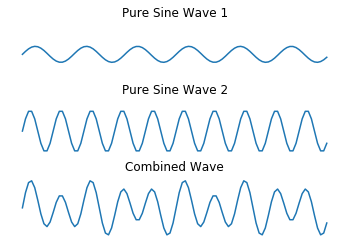

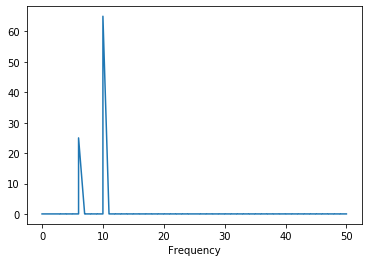

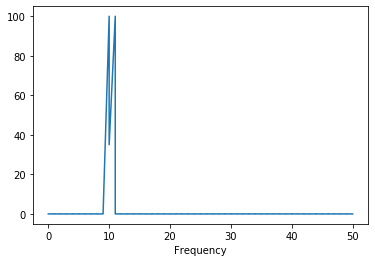

In [7]:
#Let's apply this to a signal
N = 100
n = np.arange(0, N) #All time points in an array
amp_1 = 0.5
freq_1 = 6
amp_2 = 1.3
freq_2 = 10
x = amp_1 * np.sin(2 * np.pi * freq_1 * n / N) + amp_2 * np.sin(2 * np.pi * freq_2 * n / N)

#Let's plot each of these sinusoids individually as well as their sum

fig, ax = plt.subplots(3, 1)
ax[0].plot(amp_1 * np.sin(2 * np.pi * freq_1 * n / N))
ax[1].plot(amp_2 * np.sin(2 * np.pi * freq_2 * n / N))
ax[2].plot(x)
for i in range(3): ax[i].set_ylim([-2, 2]); ax[i].set_xticks([]); ax[i].axis('off')
ax[0].set_title('Pure Sine Wave 1')
ax[1].set_title('Pure Sine Wave 2')
ax[2].set_title('Combined Wave')

#Transform the signal x using the Fourier basis you computed
#(think projection!) and plot with frequencies on the x-axis
#according to your function above

#your code here

Fourier_basis = get_Fourier_basis(N)
F_x = Fourier_basis.dot(x)

plt.figure()
plt.plot(get_frequencies(N), F_x)
plt.xlabel('Frequency')

#Note that since we doubled-up sines and cosines, every frequency
#on the x-axis is paired with an identical frequency for the other
#sine/cosine. Let's illustrate with a different signal:

N = 100
n = np.arange(0, N)
#Different set of amplitudes and frequencies
amp_1 = 2
freq_1 = 10
amp_2 = 0.7
freq_2 = 10
amp_3 = 2
freq_3 = 11
x = (amp_1 * np.cos(2 * np.pi * freq_1 * n / N) + amp_2 * np.sin(2 * np.pi * freq_2 * n / N) +
     amp_3 * np.cos(2 * np.pi * freq_3 * n/ N))

#your code here

F_x = Fourier_basis.dot(x)

plt.figure()
plt.plot(get_frequencies(N), F_x)
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

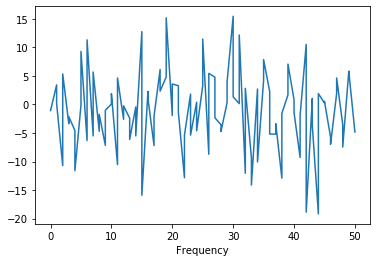

In [8]:
#Let's try signals that are not sparse combinations of sines and cosines
N = 100
sigma = 1
x = np.random.normal(0, sigma, N) #Random gaussian noise
Fourier_basis = get_Fourier_basis(N)

#your code here
plt.figure()
F_x = Fourier_basis.dot(x)
plt.plot(get_frequencies(N), F_x)
plt.xlabel('Frequency')

In [ ]:
#Exercise 3: Define your own signals as mixes of sines and cosines--or
#as anything you want! Transform them under the Fourier basis

#your code here

# White noise

What if we put in a signal with absolutely no structure to it? That is, each element $x[n]$ is an identically, independently sampled number from a Gaussian distribution $\mathcal{N}(0, 1)$, as we did above. What should we expect for the Fourier transform?

Text(0.5, 0, 'Frequency')

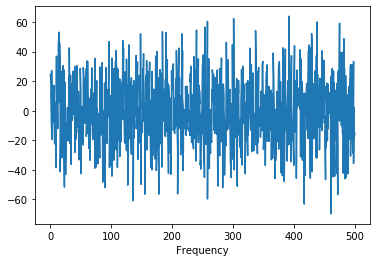

In [9]:
N = 1000
sigma = 1
x = np.random.normal(0, sigma, N)
Fourier_basis = get_Fourier_basis(N)

#your code here
plt.figure()
F_x = Fourier_basis.dot(x)
plt.plot(get_frequencies(N), F_x)
plt.xlabel('Frequency')

This looks "flat" but it's hard to tell, especially with the sines and cosines of the same frequency "scrunched up" next to each other. What'd be nice is if we could get a cleaner graph telling us how much general sine and cosine action we have going on at each frequency.

# Signal Power
At a given frequency, the signal can be decomposed into its cosine and sine component at that frequency. These are really only different by a $\pi / 2$ phase shift. What if we want to know the overall "power" at that frequency? We don't care whether it's positive or negative, and we don't care whether it's contained in the sines or cosines, we just want to know how much action is happening at each frequency. This is important for say analyzing the spectral content of sunlight--we don't care the phase of the UV radiation, we just want to know how much UV radiation is in there. To do this, we can simply compute:

$$P(f) = (\vec{x} \cdot \cos(2\pi f \vec{n} / N))^2 + (\vec{x} \cdot \sin(2\pi f \vec{n} / N))^2$$

But we already have these projection values from the Fourier transformation, so we just need to select, square, and add up the right pairs. Here is a function below that does just that.

In [10]:
#Compute the signal power
def get_signal_power(F_x):
    
    #Remove the first and last entries 
    F_x_power = F_x[1:-1]
    
    #Pair up the sines and cosines of each "middle" frequency and take their squared
    #norms as 2-vectors
    F_x_power = np.square(F_x_power.reshape((-1, 2), order='C')).sum(axis=1)
    
    #Add the first and last entries' absolute values back in
    F_x_power = np.hstack([np.abs(F_x[0]), F_x_power, np.abs(F_x[-1])])
    
    return F_x_power

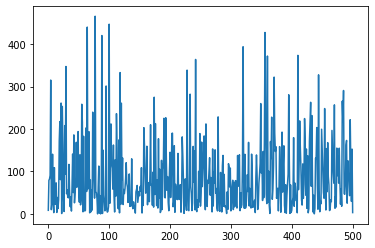

In [11]:
#Plot the power of a white noise signal
N = 1000
sigma = 0.3
x = np.random.normal(0, sigma, N) #white noise
Fourier_basis = get_Fourier_basis(N)

plt.figure()
F_x = Fourier_basis.dot(x)
F_x_power = get_signal_power(F_x)
frequencies = np.arange(0, int(N/2) + 1)
plt.plot(frequencies, F_x_power)

Try this for different values of sigma, and rerun it repeatedly to get new random outcomes. What if we averaged the result over many trials of this--what would the shape of the spectrum be?

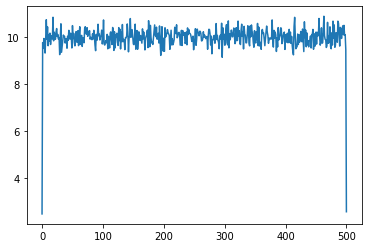

In [12]:
N_avg = 1000
N = 1000
sigma = 0.1
Fourier_basis = get_Fourier_basis(N)
power_spectra = []
plt.figure()
for i_trial in range(N_avg):
    x = np.random.normal(0, sigma, N) #latest white noise sample
    F_x = Fourier_basis.dot(x)
    F_x_power = get_signal_power(F_x)
    power_spectra.append(F_x_power)


frequencies = np.arange(0, int(N/2) + 1)
plt.plot(frequencies, sum(power_spectra)/len(power_spectra))

# The Fast Fourier Transform
We've got a roller coaster of bad news and good news.

Bad news:\
-The way we're doing the Fourier transform doesn't scale efficiently, as we have to multiply $N^2$ numbers to do this matrix-vector product, and that's assuming the Fourier basis for our signal is already generated and ready to go. For signals with high sampling rates, $N$ can be quite huge.\
\
Good news:\
-There is a method, called the *Fast Fourier Transform* that manages to do this same computation in $N \log N$ time! For big $N$, this is an *enormous* speed-up.\
\
Back to bad news:\
-To compute via FFT in Python, we have to use a black-box method and understand its slightly counterintuitive way of reporting the output. And this involves complex numbers. This may sound scary, but it's just a way of organizing sine and cosine waves.


In [13]:
#Try out the scipy fft function on a signal and see what you get
from scipy.fft import fft

N = 100
n = np.arange(0, N) #All time points in an array
amp_1 = 0.5
freq_1 = 6
amp_2 = 1.3
freq_2 = 10
x = amp_1 * np.sin(2 * np.pi * freq_1 * n / N) + amp_2 * np.sin(2 * np.pi * freq_2 * n / N)

F_x = fft(x)
#print a few values of this output, what's it look like?
print(F_x[:10])

[ 1.45994328e-14-0.00000000e+00j  7.67469194e-15-6.93929024e-15j
  9.44923251e-15-5.71840854e-15j  4.06893963e-14+2.68375535e-14j
 -1.59693692e-14+7.77706922e-15j  1.73348722e-14+4.29679720e-15j
 -7.29487251e-16-2.50000000e+01j -1.17423204e-14+6.61718660e-15j
  2.79639627e-14+1.45661975e-14j  3.33511427e-15+4.62594975e-14j]


Oof, looks like we have some complex numbers in here. That's annoying, cause we only fed in real numbers!

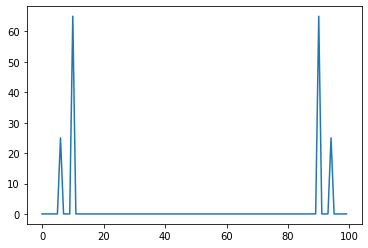

In [14]:
#Try plotting the absolute values of these complex numbers
plt.plot(np.abs(F_x))

Okay that's better, and this reminds us of our graph from previously. But what could the x-axis possibly mean in this case? Why do we see the same "spikes" twice?

# How the FFT works
The FFT assumes you have a *complex* signal in $N$ dimensions. This is more (precisely twice as much more) information as in a real signal. And the output matches this increased information: the output of the FFT is an $N$-dimensional vector with complex entries. Specifically, the FFT finds the projections of the signal onto this set of N basis vectors:
$$
\begin{pmatrix}
e^{-2\pi i k \frac{0}{N}}\\
e^{-2\pi i k \frac{1}{N}}\\
\vdots \\
e^{-2\pi i k \frac{N-1}{N}}\\
\end{pmatrix} \text{ for } k = 0, \cdots, N - 1$$
Why these? Short answer: mathematical elegance. We lose the immediate interpretability of pure cosines and sines as common sense "waves," but we gain the ease of algebra that comes with complex exponentials. We'll see the payoff of this soon.

#### But for now, how do we interpret this if we just want to keep things real?

If you start with a real signal to begin with, the output is guaranteed to have certain symmetry properties. Thus you can discard part of the output that doesn't tell you anything new. In particular, the second half of the result doesn't tell us anything the first half doesn't. If $\vec{x} \in \mathbb{R}^N$ is an $N$-dimensional vector with real entries, then

$$\vec{f} = \text{fft}(\vec{x}) \in \mathbb{C}^N$$

has symmetries

$$\text{real}(f_k) = \text{real}(f_{N-k})$$

and

$$\text{imag}(f_k) = -\text{imag}(f_{N-k})$$

In words, if we flip the output along the middle of the x-axis (i.e. move $k$ to $N-k$), we get either the same real part or the negated imaginary part--in both cases, we *learn no new information*. So we can simply discard the second half of the signal. **Then the real part of the first half maps onto the cosines for our original Fourier transform, and the negative imaginary part maps onto the sines**. By extracing the real and imaginary parts (themselves both real!) of these signals, we get back to a fully real $N$-dimensional signal, as before.

We'll get a feel for this on some examples below.

In [15]:
#Exercise 4: Using complex numbers in numpy z = x + y * 1j, 
#define the Fourier basis as written above in the manner
#we defined Fourier_basis before, as a matrix whose rows
#are each individual basis vector.

#your code here
N = 100
n = np.arange(0, N)
F = []
for k in range(N):
    F.append(np.exp(-2 * np.pi * k * n * (1j) / N))
F = np.array(F)

Text(0.5, 1.0, 'Magnitude')

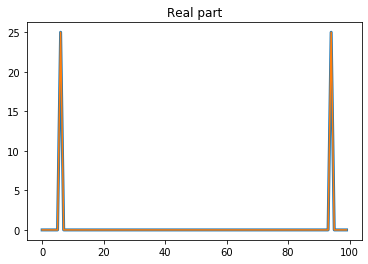

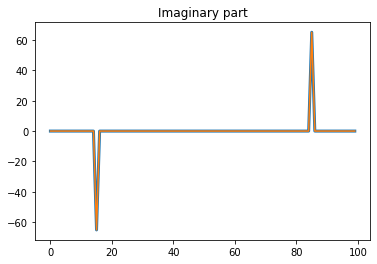

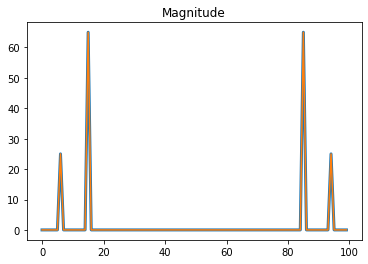

In [16]:
#Exercise 5: Define a signal and take its projection
#onto this new Fourier basis. Verify that the output
#is the same as that of the built-in fft function.
#(Use "linewidth" argument in plotting function to
# see that they plot right on top of each other)

N = 100
n = np.arange(0, N) #All time points in an array
amp_1 = 0.5
freq_1 = 6
amp_2 = 1.3
freq_2 = 15
x = amp_1 * np.cos(2 * np.pi * freq_1 * n / N) + amp_2 * np.sin(2 * np.pi * freq_2 * n / N)

#your code here
F_x_1 = fft(x) #Fourier transform via fft function
F_x_2 = F.dot(x) #Fourier transform "by hand"
plt.figure()
plt.plot(np.real(F_x_1), linewidth=3)
plt.plot(np.real(F_x_2))
plt.title('Real part')
plt.figure()
plt.plot(np.imag(F_x_1), linewidth=3)
plt.plot(np.imag(F_x_2))
plt.title('Imaginary part')
plt.figure()
plt.plot(np.abs(F_x_1), linewidth=3)
plt.plot(np.abs(F_x_2))
plt.title('Magnitude')

Text(0.5, 0, 'Frequency')

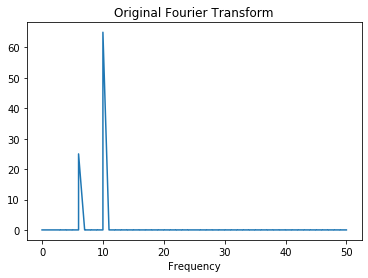

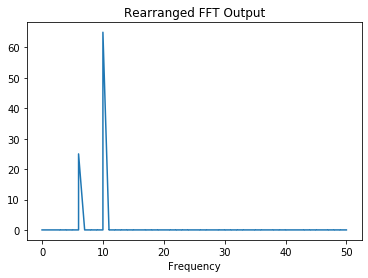

In [23]:
#Exercise 6: Now plot this same signal under our original Fourier basis. Can
#you figure out how the result of this computation maps onto the complex case?
#Explicitly extract the relevant quantities from the fft() result
#and show that they are ultimately the same as the original Fourier transformation
#when rearranged properly.

#Define example signal with pure sine waves
N = 100
n = np.arange(0, N) #All time points in an array
amp_1 = 0.5
freq_1 = 6
amp_2 = 1.3
freq_2 = 10
x = amp_1 * np.sin(2 * np.pi * freq_1 * n / N) + amp_2 * np.sin(2 * np.pi * freq_2 * n / N)

#Get our original Fourier transform via our Fourier basis
FB = get_Fourier_basis(N)
original_F_x = FB.dot(x)
#Get the Fourier transform as computed via FFT
fft_F_x = fft(x)

#Plot original
plt.figure()
plt.plot(get_frequencies(N), original_F_x)
plt.title('Original Fourier Transform')
plt.xlabel('Frequency')

#Plot fft rearranged
#your code here

#Extract only the first half of the signal
half_signal = fft_F_x[:int(N/2) + 1]

#Get the cosine and sine weights as real and negative imaginary parts
cosines = np.real(half_signal)
sines = -np.imag(half_signal)

#Remove the first and last real signals and concatenate the cosines and sines
cosines_and_sines = np.hstack([cosines[1:-1], sines[1:-1]])

#Re-order the array so that cosines and sines of same
#frequency are next to each other
#[cos1, cos2, cos3, sin1, sin2, sin3] -> [cos1, sin1, cos2, sin2, cos3, sin3]
neighboring_freq = cosines_and_sines.reshape(-1, 2, order='F').reshape(-1, order='C')

#Add the first and last cosine and sine back in
fft_remapped = np.hstack([cosines[0], neighboring_freq, cosines[-1]])

plt.figure()
plt.plot(get_frequencies(N), fft_remapped)
plt.title('Rearranged FFT Output')
plt.xlabel('Frequency')


In [20]:
len(neighboring_freq)

98

# The Convolution Theorem (or Why Complex Numbers?)

Well that was a bit of a pain, all that reshaping and extracting real numbers from the complex output just to match our first intuitive sense of what a Fourier transform. Why did we do it?

The reason, simply, is that math with complex numbers gets really nice. Let's say you have a voltage $v[t] = \cos(\omega t)$ and you want to apply some linear, shift-invariant system to it $Lv[t]$. We learned from class that, due to the linearity and shift-invariance of the system $L$, the only possible change that can be made to $v[t]$ is an *amplitude change* $A(\omega)$ and a *phase shift* $\phi(\omega)$:

$$Lv[t] = A(\omega) \cos(\omega t - \phi(\omega))$$

This is pretty simple, but we can get even simpler. Instead of thinking of the phase shift as this awkward "go inside the function argument and subtract by something" operation we currently have going, **what if both the amplitude change and phase shift could be interpreted as a single multiplication?**

To accomplish this, let's interpret $v[t]$ as the real part of a complex signal $z[t] = v[t] + y[t]i$. Complex signals mostly don't exist in nature, but they do exist in our minds. If we define $y[t] = \sin(\omega t)$, we can use the definition of a complex exponential to write

$$z[t] = \cos(\omega t) + i \sin(\omega t) = e^{i \omega t}$$

Then imagine if we define action on $z[t]$ via $L$ as multiplying by the complex number $A(\omega)e^{-i\phi(\omega)}$. What happens?

$$Lz[t] = A(\omega)e^{-i\phi(\omega)} e^{i \omega t} = A(\omega)e^{i(\omega t- \phi(\omega))} = A(\omega)\left[ \cos(\omega t - \phi(\omega)) + i \sin(\omega t - \phi(\omega))\right]$$

If we take the real part at the end, we get back our amplitude-scaled, phase-shifted signal from before!

$$\text{real}(Lz[t]) = A(\omega) \cos(\omega t - \phi(\omega)) = Lv[t]$$

# Connection with eigenvectors/eigenvalues

So you mean to tell me, we could operate with $L$ on our vector $e^{i\omega t}$... OR we could multiply it by $A(\omega)e^{-i\phi(\omega) t}$... and we get the same thing?!

### This is the definition of an eigenvector/eigenvalue

In normal matrix math, we say $\lambda$ is an eigenvalue of $A$ with corresponding eigenvector $\vec{v}$ if $A\vec{v} = \lambda \vec{v}$. Here we're saying, if $\vec{v} = e^{i\omega t}$, then

$$L\vec{v} = A(\omega)e^{-i\phi(\omega)} \vec{v}$$

so $\vec{v} = e^{i\omega t}$ is the eigenvector, while $\lambda = A(\omega)e^{-i\phi(\omega)}$ is the eigenvalue.

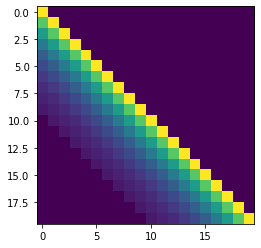

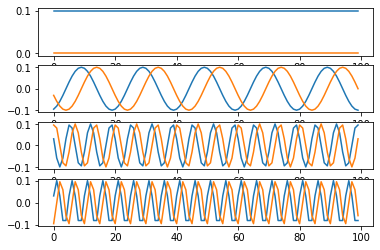

In [64]:
#Exercise 7: Recall that a linear, shift-invariant system can be characterized by convolution
#with some kernel R. And further, that this convolution can be translated (if inefficiently)
#into matrix multiplication by repeating shifted versions of R along the columns. Perform
#eigenvalue analysis on such a matrix--what do the eigenvectors look like? Do they remind you
#of anything?

N = 100
kernel = np.zeros(N)
t = np.arange(0, 10)
kernel[:10] = np.exp(-0.3 * t) #Define exponentially decaying kernel

#Generate convolution matrix R
R = np.zeros((N, N))
for i in range(N):
    R[:, i] = np.roll(kernel, i)

#Visualize this convolution matrix on a small
#patch of it
plt.figure()
plt.imshow(R[:20, :20])
    
#Now take the eigendecomposition of R and analyze the eigenvectors. Are they
#complex? Plot their real and imaginary parts for some of them

#your code here
eigs, vecs = np.linalg.eig(R)

vecs_to_plot = [0, 10, 30, 40]
fig, ax = plt.subplots(len(vecs_to_plot), 1)
for i_axis, i in enumerate(vecs_to_plot):
    ax[i_axis].plot(np.real(vecs[:,i]), color='C0')
    ax[i_axis].plot(np.imag(vecs[:,i]), color='C1')

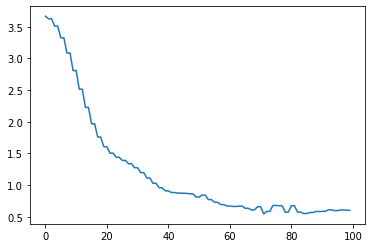

In [4]:
#Execise 7 continued: How do we interpret the eigenvalues? Plot
#the absolute values of the eigenvalues
plt.plot(np.abs(eigs))

# Making the connection between convolution and eigenvalues: filters

Let's define a "Gaussian average" filter of size 5. What effect, intuitively, should this have on a signal? (It's basically a running average, right?)

In [107]:
def get_gaussian_kernel(sigma=0.8, t_range=20):
    t = np.arange(-t_range, t_range) #Range of kernel
    kernel = np.exp(-t**2/(2 * sigma**2)) #Give kernel gaussian shape
    kernel = kernel / kernel.sum() #Make kernel normalized as an averaging window
    return kernel

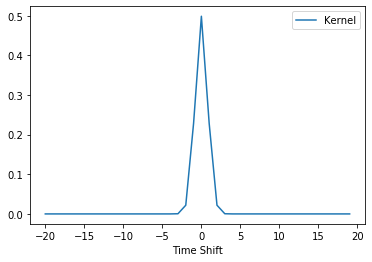

In [143]:
sigma = 0.8
t_range = 20
kernel = get_gaussian_kernel(sigma=sigma, t_range=t_range)
plt.plot(np.arange(-t_range, t_range), kernel)
plt.xlabel('Time Shift')
plt.legend(['Kernel'])

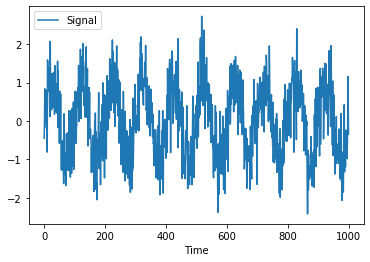

In [144]:
#Define a signal that has a clear separation of "signal" and noise
N = 1000
t = np.arange(0, N)
f = 10
noise_scale = 0.6
x = np.sin(2 * np.pi * f * t/ N) + noise_scale * np.random.normal(0, 1, N)
plt.plot(x)
plt.xlabel('Time')
plt.legend(['Signal'])

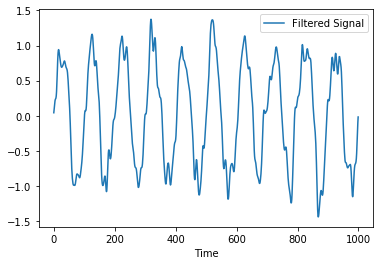

In [150]:
#Exericse 8: Convolve this signal with our kernel function, using "same"
#and plot the result. Change the values of sigma and t_range and see what
#the effect is

#your code here
kernel = get_gaussian_kernel(sigma=3, t_range=20)
plt.plot(np.convolve(x, kernel, 'same'))
plt.xlabel('Time')
plt.legend(['Filtered Signal'])

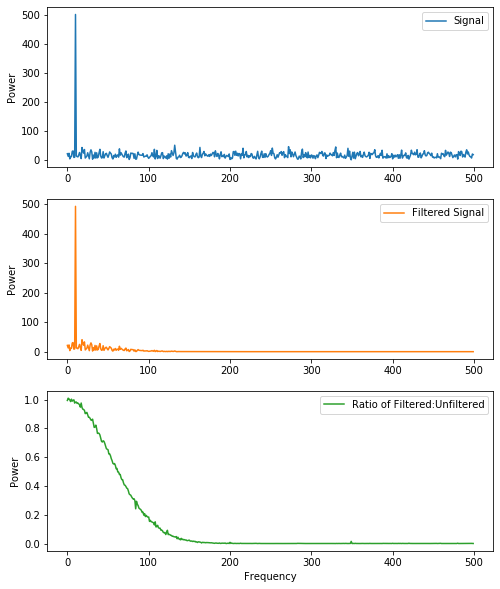

In [177]:
#Exercise 9: Finally, plot the power spectrum of the original signal x,
#the spectrum of the convolved signal with the kernel. Plot their ratio
#at each frequency. What relationship do you see?

#your code here
F_x = fft(x)
F_x_power = np.abs(F_x[:int(N/2)])

kernel = get_gaussian_kernel(sigma=3, t_range=20)
y = np.convolve(x, kernel, 'same')
F_y = fft(y)
F_y_power = np.abs(F_y[:int(N/2)])

fig, ax = plt.subplots(3, 1, figsize=(8, 10))
frequencies = np.arange(0, int(N/2))
ax[0].plot(frequencies, F_x_power, color='C0')
ax[1].plot(frequencies, F_y_power, color='C1')
ax[2].plot(frequencies, F_y_power / F_x_power, color='C2')
ax[2].set_xlabel('Frequency')
ax[0].set_ylabel('Power')
ax[1].set_ylabel('Power')
ax[2].set_ylabel('Power')
ax[0].legend(['Signal'])
ax[1].legend(['Filtered Signal'])
ax[2].legend(['Ratio of Filtered:Unfiltered'])

Text(0, 0.5, 'Power')

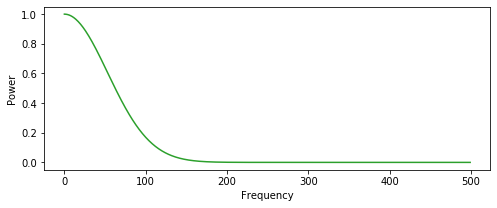

In [178]:
#Exercise 10: Compute the power of the *kernel itself*
#you used above. Hint: you may need to zero pad to make it the
#same dimensions as the original signal

padded_kernel = np.hstack([kernel, np.zeros(N - len(kernel))])

#your code here
F_r = fft(padded_kernel)
F_r_power = np.abs(F_r[:int(len(F_r)/2)])
frequencies = np.arange(0, int(len(F_r)/2))
plt.figure(figsize=(8, 3))
plt.plot(frequencies, F_r_power, color='C2')
plt.xlabel('Frequency')
plt.ylabel('Power')

In [153]:
#Exercise 11: Can we recover this from the spectrum of the convolution matrix?
# - Compute the convolution matrix by "rolling" the padded kernel as before
# - Compute its eigenvalues.
# - Plot their norms. Recognize this?

#your code here
R = np.zeros((N, N))
for i in range(N):
    R[:, i] = np.roll(padded_kernel, i)
eigs, vecs = np.linalg.eig(R)

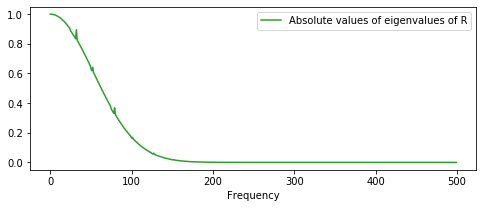

In [175]:
plt.figure(figsize=(8, 3))
frequencies = np.arange(0, N//2)
plt.plot(frequencies, np.abs(eigs)[::2], color='C2')
plt.xlabel('Frequency')
plt.legend(['Absolute values of eigenvalues of R'])